# *Python Implementation on Logistic Regression*

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [27]:
from sklearn.datasets import load_iris

In [28]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [31]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In logistic Regression till now we have studied two values of target variable (Binary classification)
- In this case we filter out for two

In [32]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
# Making data frame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [34]:
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
df.sample(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
54,6.5,2.8,4.6,1.5,1


In [36]:
# Unique values in target column
df['target'].unique()

array([0, 1, 2])

In [37]:
# We need filter two class only for binary classification
df = df[df['target'] != 2]
df['target'].unique()

array([0, 1])

In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [39]:
# Separating features and target variable  (Separating X and y )
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [40]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [41]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [42]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)   

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

In [44]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
73,6.1,2.8,4.7,1.2
97,6.2,2.9,4.3,1.3
62,6.0,2.2,4.0,1.0
19,5.1,3.8,1.5,0.3
...,...,...,...,...
75,6.6,3.0,4.4,1.4
9,4.9,3.1,1.5,0.1
72,6.3,2.5,4.9,1.5
12,4.8,3.0,1.4,0.1


In [45]:
# Model Training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model

LogisticRegression()

In [47]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [49]:
# To get the probability values on X_test
model.predict_proba(X_test)

array([[0.04043262, 0.95956738],
       [0.01046123, 0.98953877],
       [0.98706759, 0.01293241],
       [0.05440516, 0.94559484],
       [0.1383348 , 0.8616652 ],
       [0.97966131, 0.02033869],
       [0.98204504, 0.01795496],
       [0.03292232, 0.96707768],
       [0.03380573, 0.96619427],
       [0.00850516, 0.99149484],
       [0.02466034, 0.97533966],
       [0.97515854, 0.02484146],
       [0.00517837, 0.99482163],
       [0.00238366, 0.99761634],
       [0.0077453 , 0.9922547 ],
       [0.98619342, 0.01380658],
       [0.96597536, 0.03402464],
       [0.94907826, 0.05092174],
       [0.00735493, 0.99264507],
       [0.97742977, 0.02257023]])

In [50]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[ 8  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [51]:
# First two rows, 0 & 1 >> Precision, recall f1 score wrt to respective classes
# Macro avg >> Average of precision, recall, f1 score without considering the support
# Weighted avg >> Average of precision, recall, f1 score considering the support

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [53]:
# get predicted probabilities of class 1 only
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.95956738, 0.98953877, 0.01293241, 0.94559484, 0.8616652 ,
       0.02033869, 0.01795496, 0.96707768, 0.96619427, 0.99149484,
       0.97533966, 0.02484146, 0.99482163, 0.99761634, 0.9922547 ,
       0.01380658, 0.03402464, 0.05092174, 0.99264507, 0.02257023])

In [54]:
# Making ROC Curve
# Input : y_test (actual values), y_pred_prob (predicted probabilities)
# Returns : fpr, tpr, thresholds with different cut off values
# fpr - False Positive Rate
# tpr - True Positive Rate


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0. 0. 0. 1.]
TPR: [0.         0.08333333 1.         1.        ]
Thresholds: [       inf 0.99761634 0.8616652  0.01293241]


In [55]:
roc_auc = auc(fpr, tpr)
roc_auc

1.0

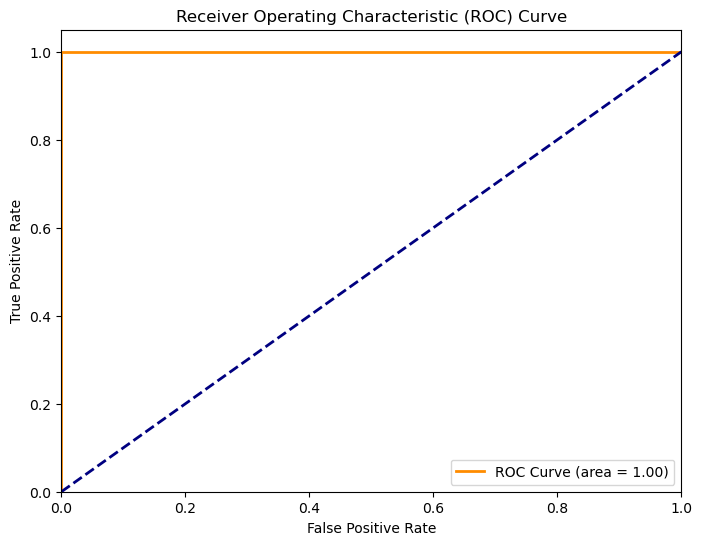

In [56]:
# Plot for ROC Curve
plt.figure(figsize=(8, 6)) # Create a new figure with specified size
plt.plot(fpr, tpr, color='darkorange', linewidth= 2, label='ROC Curve (area = %0.2f)' % roc_auc) # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', linewidth = 2, linestyle='--') # Diagonal line representing random guessing
plt.xlim([0.0, 1.0]) # Set x-axis limits
plt.ylim([0.0, 1.05]) # Set y-axis limits
plt.xlabel('False Positive Rate') # Label for x-axis
plt.ylabel('True Positive Rate') # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
plt.legend(loc='lower right') # Legend location 
plt.show()

In [57]:
# Cross validation >> Logistic Regression CV
# Randomized Search CV or Grid Search CV
# By default logistic regression CV
# Specific to logistic regression
# k-fold > Generic method


from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [58]:
cv = KFold(n_splits=5)

# Shuffle : bool, default : false
# whether to shuffle data before spitting into batches
# The sample within each split cannot be shuffle

In [59]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv = cv, scoring= 'accuracy')

In [61]:
scores

array([1., 1., 1., 1., 1.])

In [62]:
np.mean(scores)

1.0

### Generate a random n parameters problem

In [63]:
from sklearn.datasets import make_classification

In [64]:
X, y = make_classification(n_samples= 1000, n_features=10, n_redundant=5, n_informative=5, n_classes=2, random_state=1)

In [65]:
X

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

In [66]:
y

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [67]:
len(y)

1000

In [68]:
# Train - Test - Split
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700,), (300,))

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()
model

LogisticRegression()

In [73]:
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [76]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
confusion_matrix(y_test, y_pred)

array([[129,  13],
       [ 34, 124]], dtype=int64)

It means we know that

in metrices we have 
|        | Actual | Actual |
|--------|-------------|-------------|
| Predicted | TP          | FP          |
| Predicted | FN          | TN          |


So from confusion matrix we get
|        | Actual   | Actual     |
|--------|-------------|-------------|
| Predicted | 129          | 13          |
| Predicted | 34          | 124          |


In [77]:
accuracy_score(y_test, y_pred)

0.8433333333333334

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       142
           1       0.91      0.78      0.84       158

    accuracy                           0.84       300
   macro avg       0.85      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [79]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:,1]  # Probability of one class
y_pred_proba

array([0.98074543, 0.1630346 , 0.28836826, 0.13404523, 0.55118737,
       0.093381  , 0.96196454, 0.30121948, 0.12350803, 0.95731226,
       0.08778761, 0.42049714, 0.72313926, 0.23255511, 0.58121438,
       0.66837244, 0.94905128, 0.85972623, 0.97062375, 0.07234521,
       0.44982165, 0.95676726, 0.81009427, 0.10033704, 0.90917135,
       0.55589431, 0.14145472, 0.4616435 , 0.50964656, 0.17344476,
       0.24931498, 0.76014755, 0.09988604, 0.64112515, 0.95883863,
       0.9780211 , 0.98800651, 0.0543648 , 0.03435789, 0.46141478,
       0.08374178, 0.35333259, 0.02083056, 0.41419338, 0.26807876,
       0.17827763, 0.10715494, 0.37105347, 0.28588311, 0.05294433,
       0.13359114, 0.04523728, 0.62836506, 0.97984677, 0.59864183,
       0.10748243, 0.07895498, 0.17213621, 0.9844883 , 0.96882693,
       0.99515672, 0.90155236, 0.87722561, 0.36500043, 0.94415526,
       0.19466362, 0.06183406, 0.09986673, 0.45158351, 0.72166411,
       0.25229704, 0.02143247, 0.89969779, 0.5412839 , 0.98427

In [80]:
# Making ROC Curve
# Input : y_test (actual values), y_pred_prob (predicted probabilities)
# Returns : fpr, tpr, thresholds with different cut off values
# fpr - False Positive Rate
# tpr - True Positive Rate


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0.         0.         0.         0.00704225 0.00704225 0.01408451
 0.01408451 0.02112676 0.02112676 0.03521127 0.03521127 0.04225352
 0.04225352 0.05633803 0.05633803 0.06338028 0.06338028 0.07746479
 0.07746479 0.0915493  0.0915493  0.09859155 0.09859155 0.11267606
 0.11267606 0.11971831 0.11971831 0.13380282 0.13380282 0.14084507
 0.14084507 0.14788732 0.14788732 0.15492958 0.15492958 0.23239437
 0.23239437 0.28873239 0.28873239 0.29577465 0.29577465 0.3028169
 0.3028169  0.4084507  0.4084507  0.51408451 0.51408451 0.52112676
 0.52112676 0.5915493  0.5915493  0.61971831 0.61971831 0.65492958
 0.65492958 0.70422535 0.70422535 0.8028169  0.8028169  0.82394366
 0.82394366 0.86619718 0.86619718 0.9084507  0.9084507  0.91549296
 0.91549296 0.92957746 0.92957746 0.93661972 0.93661972 0.95774648
 0.95774648 0.99295775 0.99295775 1.        ]
TPR: [0.         0.00632911 0.53164557 0.53164557 0.59493671 0.59493671
 0.64556962 0.64556962 0.66455696 0.66455696 0.67721519 0.67721519
 0.6835

In [81]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8849170975218399

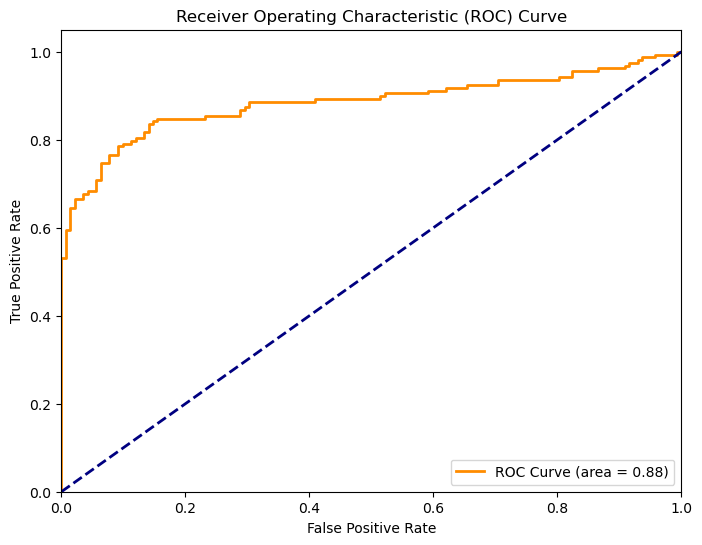

In [82]:
# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6)) # Create a new figure with specified size
plt.plot(fpr, tpr, color='darkorange', linewidth= 2, label='ROC Curve (area = %0.2f)' % roc_auc) # Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', linewidth = 2, linestyle='--') # Diagonal line representing random guessing
plt.xlim([0.0, 1.0]) # Set x-axis limits
plt.ylim([0.0, 1.05]) # Set y-axis limits
plt.xlabel('False Positive Rate') # Label for x-axis
plt.ylabel('True Positive Rate') # Label for y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve') # Title of the plot
plt.legend(loc='lower right') # Legend location
plt.show()

In [83]:
# By default prediction class is decided with cutoff 0.5
# But if you want to decide your own cutoff, you have to use precision, recall, accuracy tradeoff
# Senstivity specificity, accuracy tradeoff

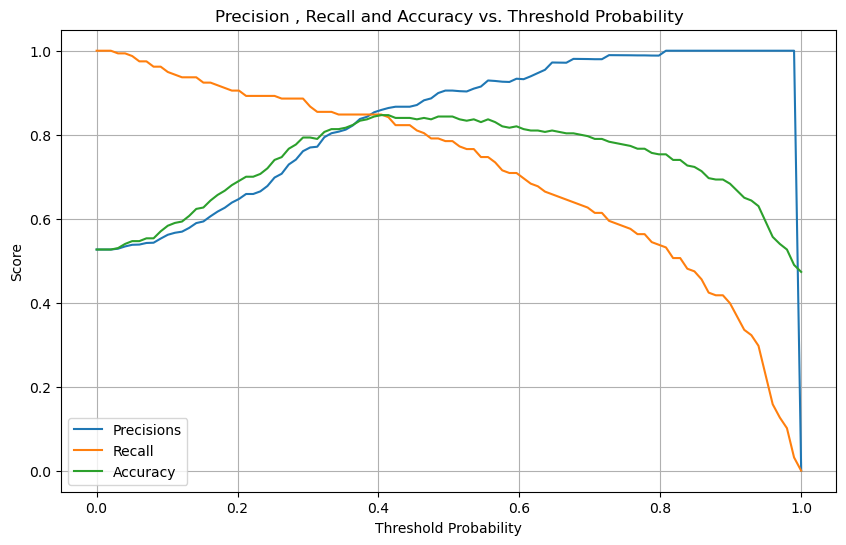

In [84]:
# Import Necessary Libraries
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score


#Calculate precision, recall and accuracy for different thresholds probabilities (cutoffs)
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
accuracies = []


for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot precision, recall and accuracy against threshold probabiliities
plt.figure(figsize = (10, 6))
plt.plot(thresholds, precisions, label= 'Precisions')
plt.plot(thresholds, recalls, label = 'Recall')
plt.plot(thresholds, accuracies, label = 'Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision , Recall and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()

> 0.4 is my optimal threshold based on precision, recall and accuracy Tradeoff

In [85]:
new_pred_levels = np.where(y_pred_proba > 0.4, 1, 0)

In [86]:
new_pred_levels

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [87]:
confusion_matrix(y_test, new_pred_levels)

array([[119,  23],
       [ 24, 134]], dtype=int64)

In [88]:
accuracy_score(y_test, new_pred_levels)

0.8433333333333334

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       142
           1       0.91      0.78      0.84       158

    accuracy                           0.84       300
   macro avg       0.85      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [90]:
# Cross Validation

from sklearn.model_selection import KFold
cv = KFold(n_splits=5)

In [91]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [92]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model, X_train, y_train, cv = cv)
acc


array([0.78571429, 0.79285714, 0.8       , 0.84285714, 0.8       ])

In [93]:
np.mean(acc)

0.8042857142857143

# Logistic Regression Implementation with Hyperparameter Tuning.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [95]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [96]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [103]:
# Hyperparamater Tuning
from sklearn.model_selection import GridSearchCV
params = {'penalty': ('l1', 'l2', 'elasticnet'), 'C': [1, 2, 10, 20, 30, 40]}

In [104]:
params

{'penalty': ('l1', 'l2', 'elasticnet'), 'C': [1, 2, 10, 20, 30, 40]}

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [106]:
clf = GridSearchCV(classifier, param_grid=params, cv=5, verbose=2)

In [107]:
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [108]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [109]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [110]:
clf.best_score_

0.80625

In [113]:
# Now prediction two ways , directly predict from best_estimator or build a separate model
clf.best_estimator_.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1])

In [114]:
model =  LogisticRegression(C= 1, penalty = 'l2')
model

LogisticRegression(C=1)

In [116]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [117]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1])

In [118]:
model.predict_proba(X_test)

array([[0.01589785, 0.98410215],
       [0.84266072, 0.15733928],
       [0.70451437, 0.29548563],
       [0.86543984, 0.13456016],
       [0.4363369 , 0.5636631 ],
       [0.91047374, 0.08952626],
       [0.03392216, 0.96607784],
       [0.68783065, 0.31216935],
       [0.88083681, 0.11916319],
       [0.03768722, 0.96231278],
       [0.92471858, 0.07528142],
       [0.57431996, 0.42568004],
       [0.26644873, 0.73355127],
       [0.76243298, 0.23756702],
       [0.40880764, 0.59119236],
       [0.3155212 , 0.6844788 ],
       [0.04282863, 0.95717137],
       [0.13068134, 0.86931866],
       [0.02514161, 0.97485839],
       [0.93007644, 0.06992356],
       [0.54540378, 0.45459622],
       [0.03750493, 0.96249507],
       [0.18078577, 0.81921423],
       [0.90346854, 0.09653146],
       [0.08076816, 0.91923184],
       [0.44235007, 0.55764993],
       [0.85423236, 0.14576764],
       [0.53766208, 0.46233792],
       [0.50778359, 0.49221641],
       [0.83037355, 0.16962645],
       [0.

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84 10]
 [25 81]]
0.825
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        94
           1       0.89      0.76      0.82       106

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



In [121]:
# Randomized Search CV >> It will take randomly some combinations

from sklearn.model_selection import RandomizedSearchCV
randomized_clf = RandomizedSearchCV(classifier, param_distributions=params, n_iter=10, cv=5, verbose=2)

In [122]:
randomized_clf

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 2, 10, 20, 30, 40],
                                        'penalty': ('l1', 'l2', 'elasticnet')},
                   verbose=2)

In [123]:
randomized_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...........................C=40, penalty=elasticnet; total time=   0.0s
[CV] END ...........................C=40, penalty=elasticnet; total time=   0.0s
[CV] END ...........................C=40, penalty=elasticnet; total time=   0.0s
[CV] END ...........................C=40, penalty=elasticnet; total time=   0.0s
[CV] END ...........................C=40, penalty=elasticnet; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.0s
[CV] END ...................................C=10

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 2, 10, 20, 30, 40],
                                        'penalty': ('l1', 'l2', 'elasticnet')},
                   verbose=2)

In [124]:
randomized_clf.best_score_

0.80625

In [125]:
randomized_clf.best_params_

{'penalty': 'l2', 'C': 10}